In [25]:
#Install required libraries 
!pip uninstall numpy -y
!pip install numpy==1.22.4
!pip install pandas

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.8 MB 5.9 MB/s eta 0:00:01
  distutils: /home2/ua20aar/.local/lib/python3.9/site-packages
  sysconfig: /home2/ua20aar/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
distutils: /home2/ua20aar/.local/lib/python3.9/site-packages
sysconfig: /home2/ua20aar/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [26]:


# Step 1: Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.decomposition import PCA  # For PCA
from sklearn.datasets import load_iris  # For loading an example dataset (Iris dataset)
import pandas as pd # For inspecting the data 

ImportError: C extension: None not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

In [20]:
# Step 2: Load the Iris dataset
# The Iris dataset is a well-known dataset that contains 150 samples of iris flowers with 4 features:
# sepal length, sepal width, petal length, and petal width.

iris = load_iris()
X = iris.data  # Feature data (4 features: sepal length, sepal width, petal length, petal width)
y = iris.target  # Target classes (3 types of Iris flowers)

# Print the shape of the feature data
print(f"Feature data shape: {X.shape}")

# Convert feature data to a DataFrame and display the first 5 rows (head)
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

Feature data shape: (150, 4)


NameError: name 'pd' is not defined

In [5]:
# Step 3: Standardise the data (mean = 0, variance = 1)
# Standardising ensures that all features have the same scale, which is important for PCA.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Standardised feature data shape: {X_scaled.shape}")


Standardised feature data shape: (150, 4)


In [6]:
# Step 4: Apply PCA to reduce the dimensionality
# We're reducing the 4-dimensional data to 2 dimensions for easy visualisation.
pca = PCA(n_components=2)  # Create a PCA model with 2 principal components
X_pca = pca.fit_transform(X_scaled)  # Fit and transform the scaled data with PCA

print(f"Reduced feature data shape (after PCA): {X_pca.shape}")


Reduced feature data shape (after PCA): (150, 2)


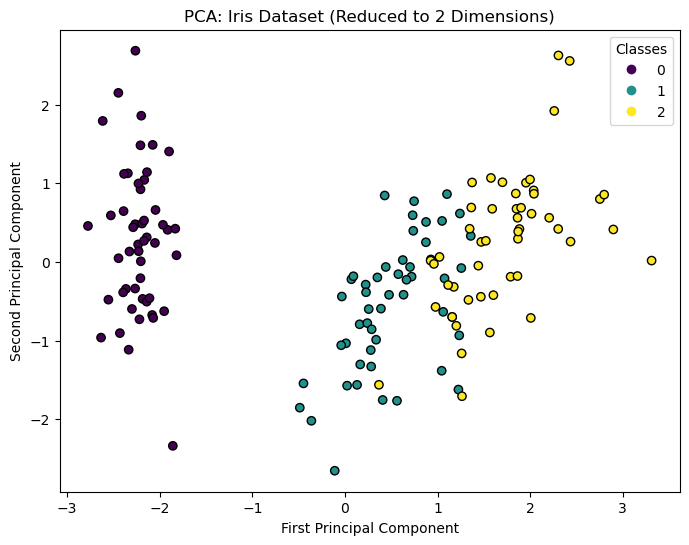

In [7]:
# Step 5: Visualise the two principal components
# We will create a scatter plot of the first two principal components.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Iris Dataset (Reduced to 2 Dimensions)')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [8]:
# Step 6: Explain the variance explained by each principal component
# PCA calculates how much variance is captured by each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each principal component: {explained_variance}")


Variance explained by each principal component: [0.72962445 0.22850762]


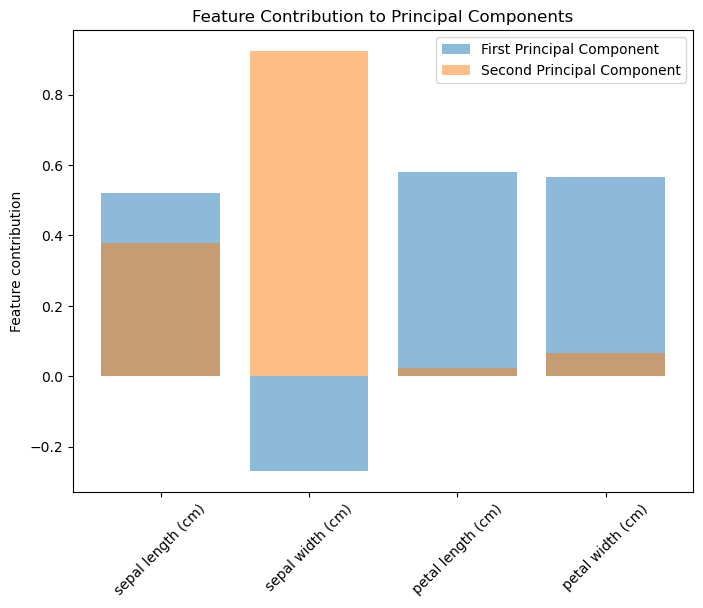

In [9]:
# Step 7: Visualise the contribution of each feature to the principal components
# Each principal component is a linear combination of the original features.
components = pca.components_
features = iris.feature_names

plt.figure(figsize=(8, 6))
plt.bar(range(len(features)), components[0], label='First Principal Component', alpha=0.5)
plt.bar(range(len(features)), components[1], label='Second Principal Component', alpha=0.5)
plt.xticks(range(len(features)), features, rotation=45)
plt.ylabel('Feature contribution')
plt.legend()
plt.title('Feature Contribution to Principal Components')
plt.show()
